A capstone project of Google Advanced Data Analytics Professional Certificate

Waze's free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. Waze partners with cities, transportation authorities, broadcasters, businesses, and first responders to help as many people as possible travel more efficiently and safely.


Project Objectives
1. Understand the customer behvoiours by analyzing the datasetto make the data-driven insights
2. Develop a custom churn prediction model to increase the growth of waze and customer rentention.


Project Outlines
1. Analyzing and Understanding the dataset
2. Performing Exploratory Data Analysis (EDA)
3. Hypothesis Testing
4. Data Preparation for Machine Learning Models
5. Logistic Regressiong Model
6. XG Boost Model
7. Model Validation and Testing on unseen data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier,plot_importance

from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score, \
f1_score,confusion_matrix,ConfusionMatrixDisplay,RocCurveDisplay,PrecisionRecallDisplay,roc_auc_score,roc_curve,auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/AI Essential Batch-1/waze_dataset.csv')
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


## **1. ANALYZING AND UNDERSTANDING THE DATASET**

In [ ]:
df.shape

(14999, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [ ]:
df.isnull().sum()

,0
ID,0
label,700
sessions,0
drives,0
total_sessions,0
n_days_after_onboarding,0
total_navigations_fav1,0
total_navigations_fav2,0
driven_km_drives,0
duration_minutes_drives,0


Both numerical and categorical features are included and 700  missing values are found in target column 'label'.

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [ ]:
df['label'].value_counts()

,count
label,
retained,11763
churned,2536


In [ ]:
df['label'].value_counts(normalize=True) *100

,proportion
label,
retained,82.264494
churned,17.735506


200 missing values in the target column 'label'. We will figure it out the missing values are on random or on purpose lefting out.

In [ ]:
#Adding a new column 'label_missing' where null values are assigned as 1 and presented label as 0.
df['label_missing'] = df['label'].isnull().astype(int)
df['label_missing'].value_counts()

,count
label_missing,
0,14299
1,700


Creating 2 dataframes as one with null values and one without null values.

In [ ]:
df_null = df[df['label'].isna()]

In [ ]:
df_good = df[~df['label'].isna()]

In [ ]:
df_null.isnull().sum()

,0
ID,0
label,700
sessions,0
drives,0
total_sessions,0
n_days_after_onboarding,0
total_navigations_fav1,0
total_navigations_fav2,0
driven_km_drives,0
duration_minutes_drives,0


In [ ]:
df_good.isnull().sum()

,0
ID,0
label,0
sessions,0
drives,0
total_sessions,0
n_days_after_onboarding,0
total_navigations_fav1,0
total_navigations_fav2,0
driven_km_drives,0
duration_minutes_drives,0


In [ ]:
df_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,label_missing
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.0
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714,1.0
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373,0.0
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000,1.0
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000,1.0
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000,1.0
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000,1.0
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000,1.0


In [ ]:
df_good.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,label_missing
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.0
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530,0.0
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835,0.0
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.0
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,0.0
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,0.0
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,0.0
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,0.0


By the statistics description, there is not a significant difference between rows with null values and rows without null values. We will confirm using the categorical data column 'device'.



In [ ]:
device_cnt_df = df['device'].value_counts(normalize=True)
device_cnt_df

,proportion
device,
iPhone,0.644843
Android,0.355157


In [ ]:
device_cnt_null = df_null['device'].value_counts(normalize=True)
device_cnt_null

,proportion
device,
iPhone,0.638571
Android,0.361429


In [ ]:
device_cnt_good = df_good['device'].value_counts(normalize=True)
device_cnt_good

,proportion
device,
iPhone,0.64515
Android,0.35485


All dataframes show the similar proportion of device count despite of including null values or not. Based on both statical description and categorical analysis, we can say that missing values in 'label' column will not affect on the dataset and further analysis.

In [ ]:
df = df.drop(columns = ['label_missing', 'ID'])

# **2. EXPLORATORY DATA ANALYSIS**

In [ ]:
label_cnt = df['label'].value_counts()
label_cnt

,count
label,
retained,11763
churned,2536


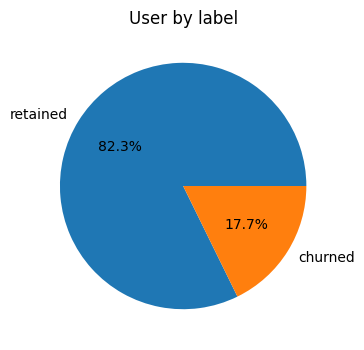

In [ ]:
plt.figure(figsize=(6,4))
label_cnt.plot(kind= 'pie', autopct='%1.1f%%')
plt.title("User by label")
plt.ylabel('')
plt.show()

17% of users were churned last month.

**Understanding the Differnt Behaviours of Churned Users and Retained Users**

In [ ]:
df.groupby(['label']).median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


Churned users drove almost 200 km more than retained users in last month. But for activity days and driving days , reatianed users have average twice of day count than churned users.

**Understanding** **the** **data** **distrinution** **of** **numerical** **columns**

Univariate Data Analysis

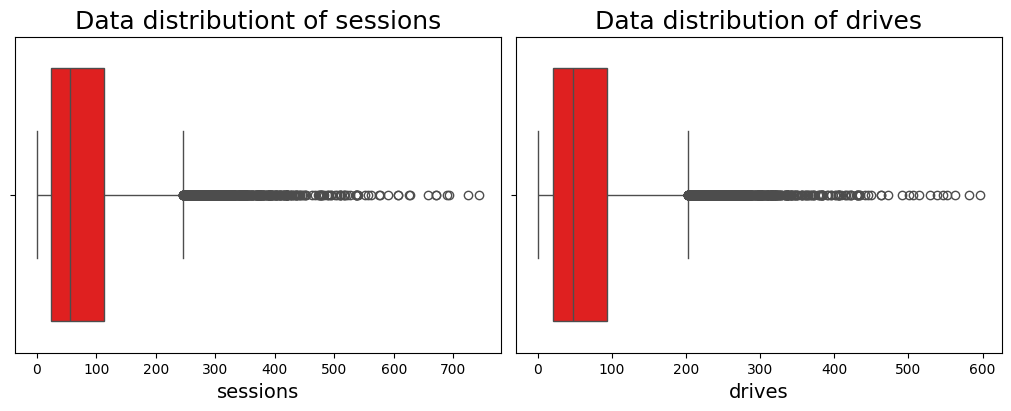

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='sessions',color='r',ax=ax1)
ax1.set_xlabel("sessions",fontsize=14)
ax1.set_title('Data distributiont of sessions',fontsize=18)

ax2 = sns.boxplot(data=df,x='drives',color='r',ax=ax2)
ax2.set_xlabel("drives",fontsize=14)
ax2.set_title('Data distribution of drives',fontsize=18);

Both 'drive' and 'sessions' features show the right skewed data distribution with some outliers presented.

sessions and drives

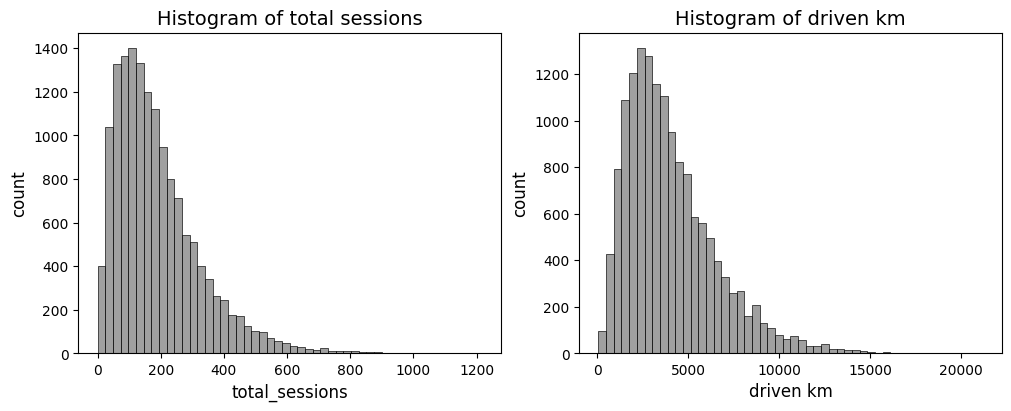

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

sns.histplot(data=df, x='total_sessions', bins=50, color='grey', ax=ax1)
ax1.set_title('Histogram of total sessions', fontsize=14)
ax1.set_xlabel('total_sessions', fontsize=12)
ax1.set_ylabel('count', fontsize=12)

sns.histplot(data=df, x='driven_km_drives', bins=50, color='grey', ax=ax2)
ax2.set_title('Histogram of driven km', fontsize=14)
ax2.set_xlabel('driven km', fontsize=12)
ax2.set_ylabel('count', fontsize=12)

plt.show()

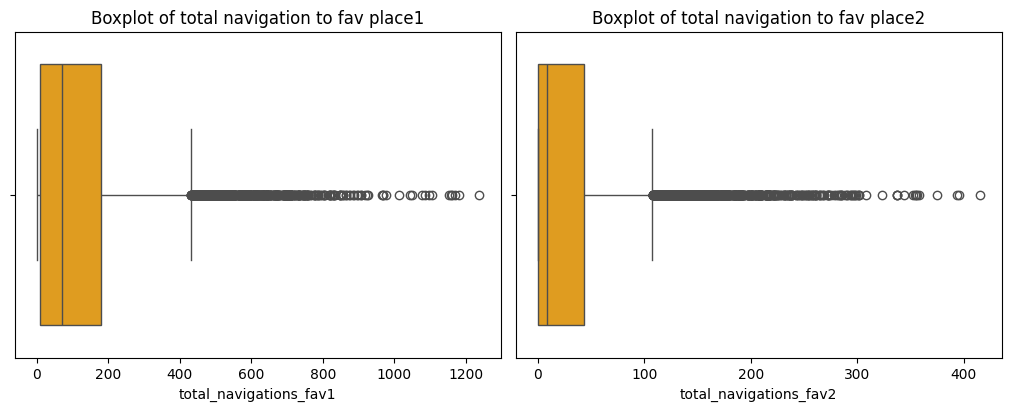

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='total_navigations_fav1',color='orange',ax=ax1)
ax1.set_xlabel("total_navigations_fav1")
ax1.set_title('Boxplot of total navigation to fav place1')

ax2 = sns.boxplot(data=df,x='total_navigations_fav2',color='orange',ax=ax2)
ax2.set_xlabel("total_navigations_fav2")
ax2.set_title('Boxplot of total navigation to fav place2');

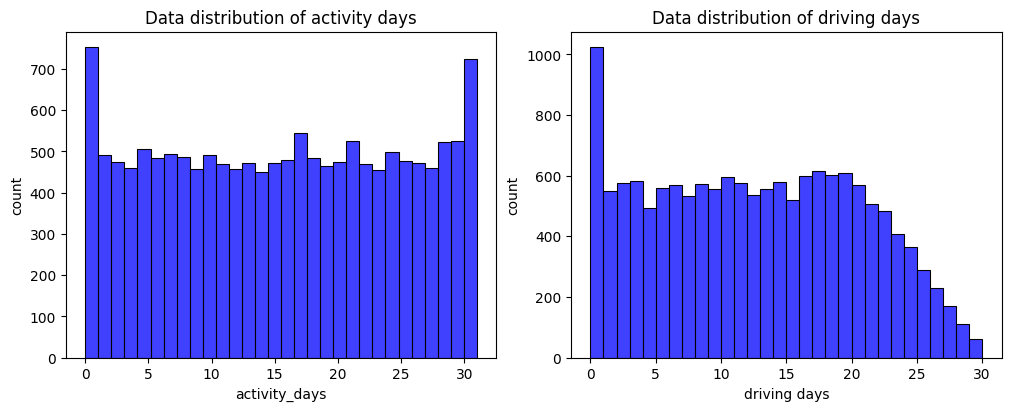

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

sns.histplot(data=df, x='activity_days', bins=30, color='blue', ax=ax1)
ax1.set_title('Data distribution of activity days')
ax1.set_xlabel('activity_days')
ax1.set_ylabel('count')

sns.histplot(data=df, x='driving_days', bins=30, color='blue', ax=ax2)
ax2.set_title('Data distribution of driving days')
ax2.set_xlabel('driving days')
ax2.set_ylabel('count')

plt.show()

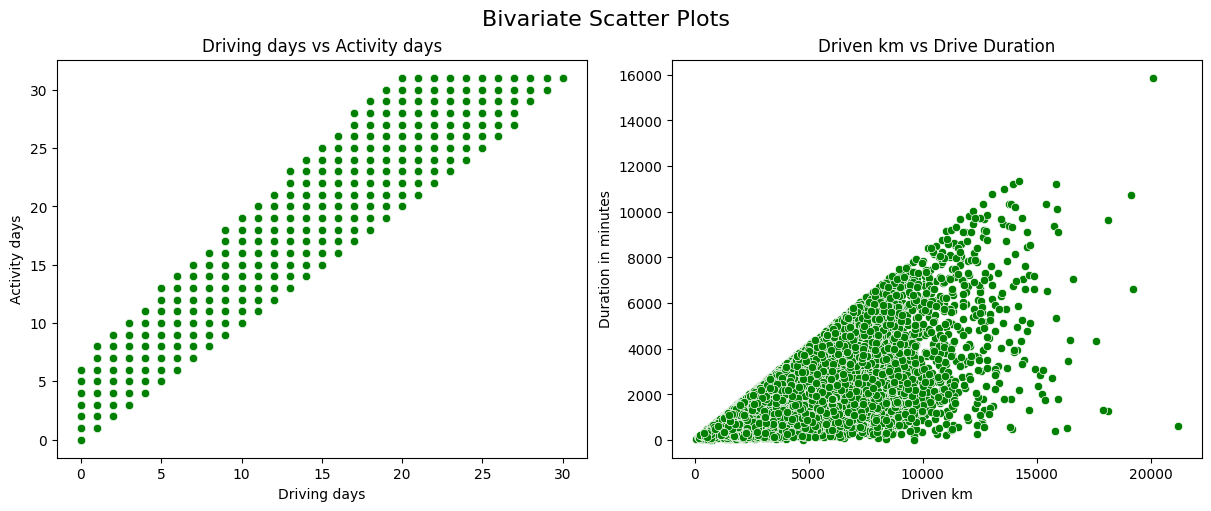

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

sns.scatterplot(data=df, x='driving_days', y='activity_days', color = 'green',ax=ax1)

ax1.set_title('Driving days vs Activity days' )
ax1.set_xlabel('Driving days')
ax1.set_ylabel('Activity days')

sns.scatterplot(data=df, x='driven_km_drives', y='duration_minutes_drives', color = 'green', ax=ax2)
ax2.set_title('Driven km vs Drive Duration')
ax2.set_xlabel('Driven km')
ax2.set_ylabel('Duration in minutes')

fig.suptitle('Bivariate Scatter Plots', fontsize=16)

plt.show()

**Bivariate analysis with target 'label' column**

In [ ]:
label_cnt_by_device = pd.crosstab(df['label'],df['device'], normalize=True)
print(label_cnt_by_device)

device     Android    iPhone
label                       
churned   0.062312  0.115043
retained  0.292538  0.530107


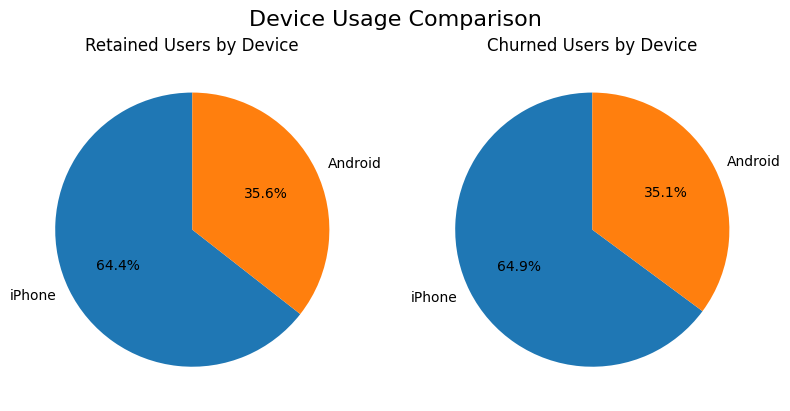

In [ ]:

retained_users = df[df['label'] == 'retained']
churned_users = df[df['label'] == 'churned']

retained_device_counts = retained_users['device'].value_counts()
churned_device_counts = churned_users['device'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)

retained_device_counts.plot(
    kind='pie',
    ax=ax1,
    autopct='%1.1f%%',
    startangle=90,
    title='Retained Users by Device'
)
ax1.set_ylabel('')

churned_device_counts.plot(
    kind='pie',
    ax=ax2,
    autopct='%1.1f%%',
    startangle=90,
    title='Churned Users by Device'
)
ax2.set_ylabel('')

fig.suptitle('Device Usage Comparison', fontsize=16)

plt.show()


iPhone users presented almost twice as andriod uses.

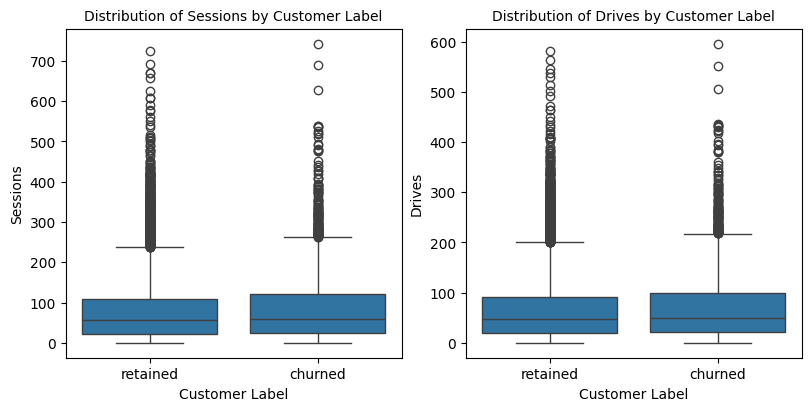

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)

#sns.boxplot(data=df, x='label', y='sessions', ax=ax1, palette='Set1')
sns.boxplot(data=df, x='label', y='sessions', ax=ax1)
ax1.set_title('Distribution of Sessions by Customer Label', fontsize=10)
ax1.set_xlabel('Customer Label')
ax1.set_ylabel('Sessions')

#sns.boxplot(data=df, x='label', y='drives', ax=ax2, palette='Set2')
sns.boxplot(data=df, x='label', y='drives', ax=ax2,)
ax2.set_title('Distribution of Drives by Customer Label', fontsize=10)
ax2.set_xlabel('Customer Label')
ax2.set_ylabel('Drives')

plt.show()

Customer behaviours on sessions and drives over label does not show any significant difference.

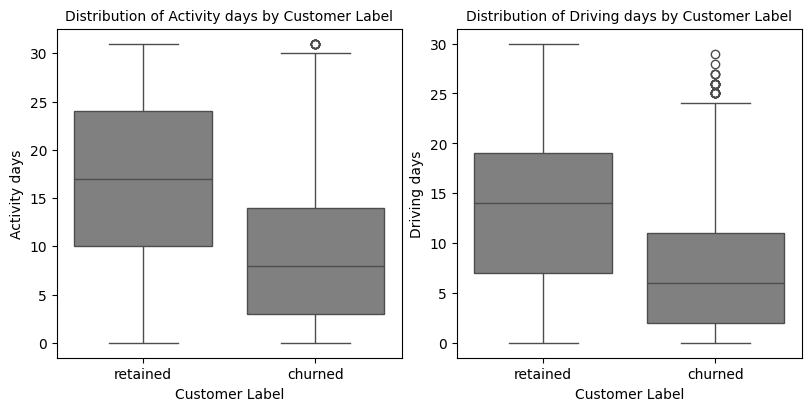

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)

sns.boxplot(data=df, x='label', y='activity_days', color = 'grey', ax=ax1)
ax1.set_title('Distribution of Activity days by Customer Label', fontsize=10)
ax1.set_xlabel('Customer Label')
ax1.set_ylabel('Activity days')

sns.boxplot(data=df, x='label', y='driving_days', color= 'grey', ax=ax2,)
ax2.set_title('Distribution of Driving days by Customer Label', fontsize=10)
ax2.set_xlabel('Customer Label')
ax2.set_ylabel('Driving days')

plt.show()

Churn users have relatively low activity days and driving days compared to retained users.

Rows with null vlaues in 'label' column will be dropped.

In [ ]:
df = df.dropna(subset=['label'])

In [ ]:
df.isnull().sum()

,0
ID,0
label,0
sessions,0
drives,0
total_sessions,0
n_days_after_onboarding,0
total_navigations_fav1,0
total_navigations_fav2,0
driven_km_drives,0
duration_minutes_drives,0


In [ ]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


From the abover data analysis and data visualizations, there are outliers presented in some columns.

In [ ]:
def outlier_imputer(column_name,percentile):
    threshold = df[column_name].quantile(percentile)
    df.loc[df[column_name] > threshold,column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name,percentile,threshold))

In [ ]:
for column in ['sessions','drives','total_sessions','driven_km_drives','duration_minutes_drives',
               'total_navigations_fav1','total_navigations_fav2']:
    outlier_imputer(column,0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 200.0
           total_sessions | percentile: 0.95 | threshold: 455.4394923899998
         driven_km_drives | percentile: 0.95 | threshold: 8898.716274999999
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.180091799999
   total_navigations_fav1 | percentile: 0.95 | threshold: 422.0
   total_navigations_fav2 | percentile: 0.95 | threshold: 124.0


# **3. HYPOTHESIS TESTING**

In [ ]:
churned_df = df[df['label'] == 'churned']
retained_df = df[df['label'] == 'retained']

Three Hypothesis testings: two independent T-test and one chi-squared test will be conducted.

Independent T-test for 'sessions' and 'drives' on churned_users and reatianed_users.

H0: The mean values for churned and retained users are the same.

Ha: The mean values for churned and retained users are different.

In [ ]:
t_stat, p_value_ttest = stats.ttest_ind(churned_df['sessions'], retained_df['sessions'])
print(f"T-statistic : {t_stat:.4f}")
print(f"P-value : {p_value_ttest:.4f}")

T-statistic : 4.1769
P-value : 0.0000


In [ ]:
t_stat, p_value_ttest = stats.ttest_ind(churned_df['drives'], retained_df['drives'])
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_ttest:.4f}")

T-statistic: 4.2912
P-value: 0.0000


For the T-test and p-values, Reject the null hypothesis. There is a significant difference in sessions and drives to the label.

Chi-squared test for 'device' vs 'label'

H0: There is no association between device type and user churn.

Ha: There is an association between device type and user churn.

In [ ]:
device_by_label = pd.crosstab(df['device'], df['label'])
chi2, p_value_chi2, _, _ = stats.chi2_contingency(device_by_label)
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"P-value: {p_value_chi2:.4f}")

Chi-squared statistic: 0.1477
P-value: 0.7007


For p-value > 0.05, Fail to reject the null hypothesis. There is no significant association between device and churn. For the further purpose, 'device' column will be dropped.

In [ ]:
df = df.drop(columns=['device'])

# **4. Data Preparation for Machine Learning Model**

In [ ]:
df['label'] = np.where(df['label']=='churned', 1, 0)
df['label'].value_counts()

,count
label,
0,11763
1,2536


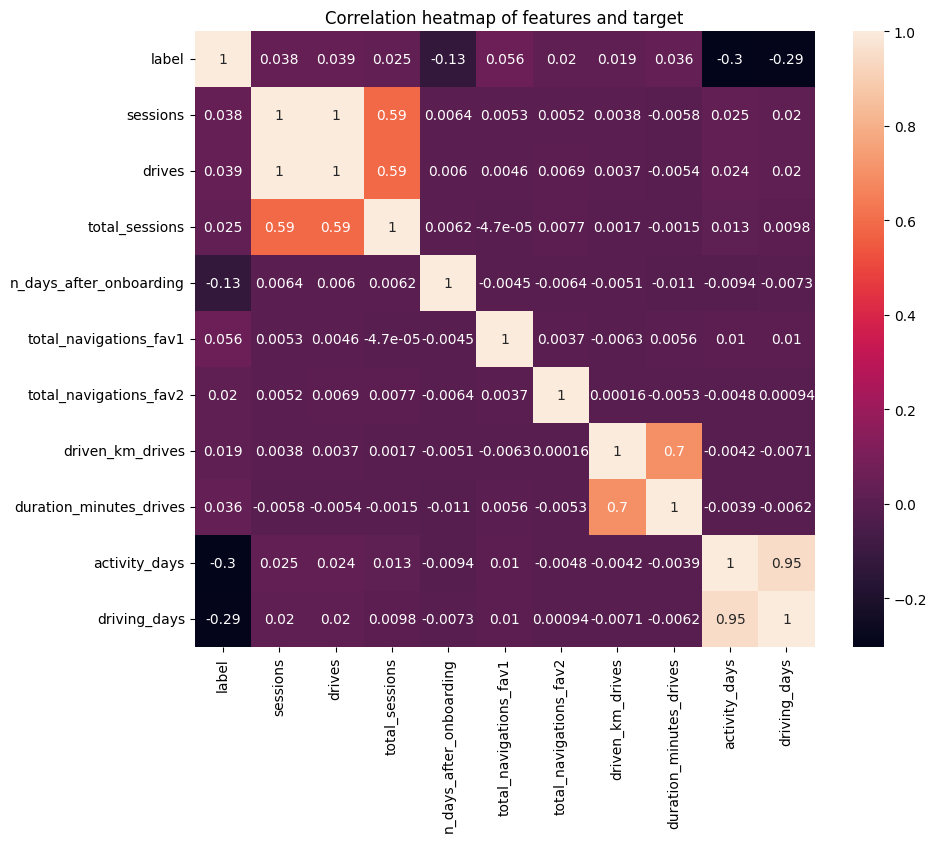

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation heatmap of features and target")
plt.show()

Based on the correlation matrix, most features have strong correlation with target column while some features show low correlation. Low correlation features can be dropped but this dataset has small amount of features, so they will not be dropped here.

# **5. Logestic** **Regression** **Model**

In [ ]:
X = df.drop(columns='label')
y = df['label']

In [ ]:
X.head()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19
1,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11
2,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8
3,49,40,67.589221,15,322,7,913.591123,587.196542,7,3
4,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18


In [ ]:
y.value_counts()

,count
label,
0,11763
1,2536


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Shape of X_train:{X_train.shape}")
print(f"Shape of X_test:{X_test.shape}")
print(f"Shape of y_train:{y_train.shape}")
print(f"Shape of y_test:{y_test.shape}")

Shape of X_train:(11439, 10)
Shape of X_test:(2860, 10)
Shape of y_train:(11439,)
Shape of y_test:(2860,)


In [ ]:
y_train.unique()

array([0, 1])

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled,y_train)



print("Bi-class Logistic Regression model is successfully trained.")

Bi-class Logistic Regression model is successfully trained.


In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
pd.Series(model.coef_[0],index=X.columns)

,0
sessions,0.056068
drives,0.078654
total_sessions,0.024819
n_days_after_onboarding,-0.379932
total_navigations_fav1,0.167656
total_navigations_fav2,0.062254
driven_km_drives,-0.053105
duration_minutes_drives,0.127837
activity_days,-0.682612
driving_days,-0.277651


In [ ]:
model.intercept_

array([-1.86843256])

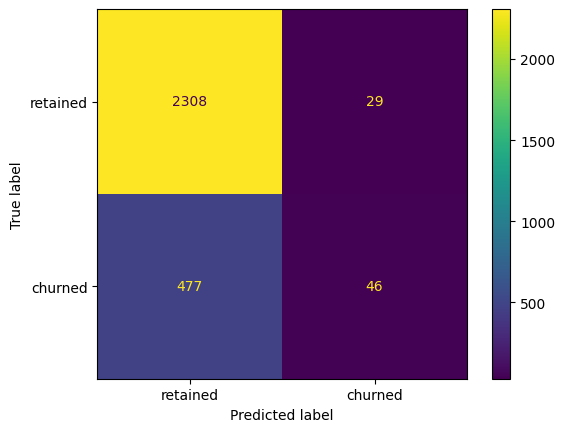

In [ ]:
cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['retained','churned'])
disp.plot();

In [ ]:
target_labels = ['retained','churned']
print(classification_report(y_test,y_pred,target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.99      0.90      2337
     churned       0.61      0.09      0.15       523

    accuracy                           0.82      2860
   macro avg       0.72      0.54      0.53      2860
weighted avg       0.79      0.82      0.76      2860



Binary-classification Logistic Model can give the overa ll accuracy of 82%. Model can identify the retained users very well but has difficulty in detecting the churn uses. Model performance can be improve by addressing the class imbalance or using using different classification threadshold.

# **6.XG Boost Machine Learning Model**

Training dataset is divided into training and validation datsets for testing the unseen data.

In [ ]:
data= df.copy()

In [ ]:
data.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
0,0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19
1,0,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11
2,0,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8
3,0,49,40,67.589221,15,322,7,913.591123,587.196542,7,3
4,0,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18


In [ ]:
X_tr,X_val,y_tr,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(f"Shape of X_tr:{X_tr.shape}")
print(f"Shape of X_val:{X_val.shape}")
print(f"Shape of y_tr:{y_tr.shape}")
print(f"Shape of y_val:{y_val.shape}")

Shape of X_tr:(11439, 10)
Shape of X_val:(2860, 10)
Shape of y_tr:(11439,)
Shape of y_val:(2860,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_tr,y_tr,test_size=0.2,random_state=42)

In [ ]:
print(f"Shape of X_tr:{X_train.shape}")
print(f"Shape of X_val:{X_test.shape}")
print(f"Shape of y_tr:{y_train.shape}")
print(f"Shape of y_val:{y_test.shape}")

Shape of X_tr:(9151, 10)
Shape of X_val:(2860, 10)
Shape of y_tr:(9151,)
Shape of y_val:(2288,)


In [ ]:

XGB_Model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# 4. Instantiate the GridSearchCV object
XGB_cv = GridSearchCV(XGB_Model, cv_params, scoring=scoring_metrics, cv=4, refit='recall')

In [ ]:
XGB_cv.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [ ]:
XGB_cv.best_score_

np.float64(0.17359592659017764)

In [ ]:
XGB_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 300}

In [ ]:
def model_results(model_name:str, model_object, metric:str):

    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [ ]:
results = model_results('XGB cv', XGB_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,XGB cv,0.411295,0.173596,0.243592,0.810075


# **7. XG Boost Model Validation and Testing on unseen data**

In [ ]:
def model_validate(model_name:str, preds, y_test_data):

    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [ ]:
XGB_val_preds = XGB_cv.best_estimator_.predict(X_val)

In [ ]:
XGB_val_scores = model_validate('XGB val', XGB_val_preds, y_val)
results = pd.concat([results, XGB_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,XGB cv,0.411295,0.173596,0.243592,0.810075
0,XGB val,0.412556,0.175908,0.246649,0.803497


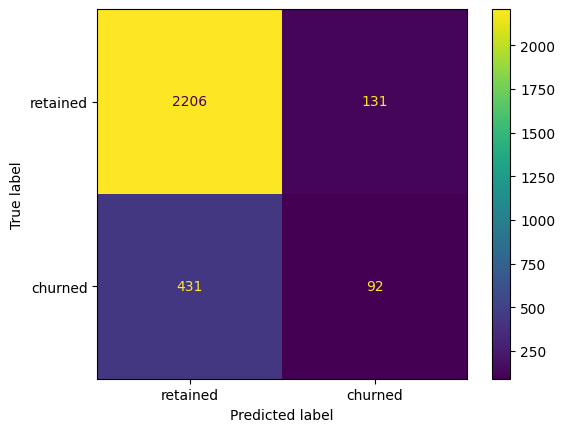

In [ ]:
cm = confusion_matrix(y_val, XGB_val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

XG Boost model has similar performance both on training and validation data showing model is not overfitting even tho it still fails to detect the actual churn users perfectly.

**Testing XG Boost Model on Unseen test data**

In [ ]:
XGB_test_preds = XGB_cv.best_estimator_.predict(X_test)
XGB_test_scores = model_validate('XGB test', XGB_test_preds, y_test)


In [ ]:
results = pd.concat([results, XGB_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,XGB cv,0.411295,0.173596,0.243592,0.810075
0,XGB val,0.412556,0.175908,0.246649,0.803497
0,XGB test,0.355556,0.120000,0.179439,0.808129


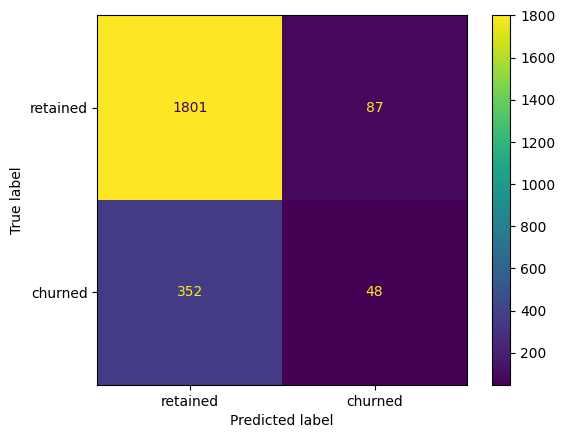

In [ ]:
cm = confusion_matrix(y_test, XGB_test_preds, labels=XGB_cv.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['retained', 'churned'])
disp.plot();

XG Boost model shows consistent model performance across training, validation and unseen data testing but still have poor values on  precision and recall. The performance metrics are stable across the cross-validation, validation, and test sets which means model is not overfitting to the training data.